# 10. Classifying Constable's Clouds

```{sidebar} Datasets
  * [Science Museum](https://www.sciencemuseum.org.uk)
  * [V&A](https://www.vam.ac.uk/)
```

The V&A and Science Museum have many items in common in their collections, but often collected for different reasons, some of the objects showing how people have responded to some of the problems and challenges of their times. Living in the United Kingdom, one of the most recurring problems we want an answer to is, what kind of rainy clouds might be hanging over our heads today? And equally importantly (for the sake of this example), what clouds were hanging over Constable's head 200 years ago?. The Science Museum has, on loan from the [Royal Meteorological Society](https://www.rmets.org/), a set of sketches classifying and naming clouds developed by the pioneering meteorologist [Luke Howard](https://blog.sciencemuseum.org.uk/the-man-who-named-the-clouds/). The V&A holds many of [Constable's drawings and sketches](https://www.vam.ac.uk/collections/john-constable). So, let's see if we can use the Science Museum images to identify the Constable's clouds.

In [1]:
import sys
# YOu will need to update this path to where you have installed ivpy - https://github.com/damoncrockett/ivpy
sys.path.append("/your/path/to/ivpy/src")

```{note}
The proper study of weather in Constable paintings and the relationship to Howard's cloud studies has been carried out by researchers in various disciplines; this is not one of these serious studies and no art historical or meterological conclusions should be drawn from this artifical example. Those interested in using historical sources for identifying patterns in weather may like to look at the [Old Weather](https://www.oldweather.org/) project.
```

## Luke Howard Cloud Classification

As [discussed](https://blog.sciencemuseum.org.uk/the-man-who-named-the-clouds/) by the Science Museum, Howard wanted to provide names for each different type of cloud. He documented his observations with a set of cloud sketches, viewable in the Science Museum [collection](https://collection.sciencemuseumgroup.org.uk/search/images/makers/luke-howard?q=cloud%20study). So first we need to retrieve these via the Science Museum [API](https://www.sciencemuseumgroup.org.uk/about-us/collection/using-our-collection-api/).

In [5]:
import requests
import pandas as pd

req = requests.get("https://collection.sciencemuseumgroup.org.uk/search/images/makers/luke-howard?q=cloud%20study&page%5Bsize%5D=18", headers = {"Accept": "application/json"})
sciencemuseum_clouds_json = req.json()
sciencemuseum_clouds = []
for obj in sciencemuseum_clouds_json['data']:
    sciencemuseum_clouds.append([obj['attributes']['description'][0]['value'], obj['attributes']['multimedia'][0]['@processed']['large_thumbnail']['location'], obj['links']['self']])

sciencemuseum_clouds_df = pd.DataFrame(sciencemuseum_clouds, columns=['Title', 'Thumbnail', 'Link'])
sciencemuseum_clouds_df.head(10)

,Title,Thumbnail,Link
0,"Cloud study by Luke Howard, c1803-1811: Nimbus...",https://coimages.sciencemuseumgroup.org.uk/239...,https://collection.sciencemuseumgroup.org.uk/o...
1,"Cloud study by Luke Howard, c1803-1811: Cirrus...",https://coimages.sciencemuseumgroup.org.uk/673...,https://collection.sciencemuseumgroup.org.uk/o...
2,"Cloud study by Luke Howard, c1803-1811: Stratu...",https://coimages.sciencemuseumgroup.org.uk/671...,https://collection.sciencemuseumgroup.org.uk/o...
3,"Cloud study by Luke Howard, c1803-1811: Dark c...",https://coimages.sciencemuseumgroup.org.uk/57/...,https://collection.sciencemuseumgroup.org.uk/o...
4,"Cloud study by Luke Howard, c1803-1811: Cumulu...",https://coimages.sciencemuseumgroup.org.uk/63/...,https://collection.sciencemuseumgroup.org.uk/o...
5,"A collection of 51 drawings with 1 engraving, ...",https://coimages.sciencemuseumgroup.org.uk/239...,https://collection.sciencemuseumgroup.org.uk/o...
6,"Cloud study by Luke Howard, c1803-1811: Cirroc...",https://coimages.sciencemuseumgroup.org.uk/57/...,https://collection.sciencemuseumgroup.org.uk/o...
7,"Cloud study by Luke Howard, c1803-1811: Cumulu...",https://coimages.sciencemuseumgroup.org.uk/673...,https://collection.sciencemuseumgroup.org.uk/o...
8,"Cloud study by Luke Howard, c1803-1811: Cumulu...",https://coimages.sciencemuseumgroup.org.uk/673...,https://collection.sciencemuseumgroup.org.uk/o...
9,"Cloud study by Luke Howard, c1803-1811: Cirroc...",https://coimages.sciencemuseumgroup.org.uk/671...,https://collection.sciencemuseumgroup.org.uk/o...


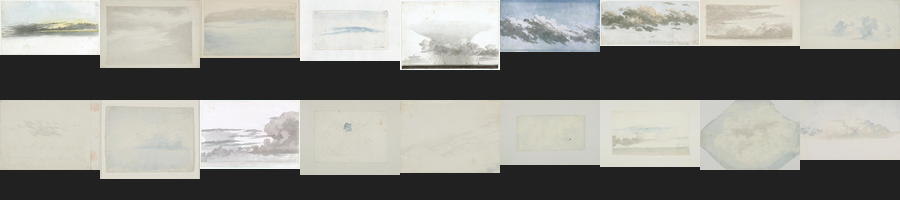

In [6]:
from ivpy import attach,show

attach(sciencemuseum_clouds_df, "Thumbnail")
show()

All suitably cloudlike. Some of the sketches contain landscape scenery which will be problematic and should be excluded if this was a real attempt to construct a cloud classification training set (and the many other steps needed to construct a real training set, such os the removal of signatures/text, removing the backdrop, and so on)

So now we have what we need for our small classification training set, lets start looking at some [Constable clouds](https://collections.vam.ac.uk/search/?q=clouds%20constable&images_exist=true&page=1) at the V&A using our API.

## Constable Clouds

In [7]:
import requests
import pandas as pd

vam_clouds_df = pd.read_csv("https://api.vam.ac.uk/v2/objects/search?q_object_title=Cloud&id_person=A8267&images_exist=1&response_format=csv")
vam_clouds_df.head(5)

,accessionNumber,accessionYear,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,590-1888,1888,O82726,Oil painting,Study of Clouds,Great Britain,"Constable, John (RA)",artist,05/09/1822,2014HA9998,oil paint,oil painting,British School,On short term loan out for exhibition,False,False
1,P.8-1973,1973,O1041774,Watercolour,Landscape with trees and clouds,England,Constable,artist,ca. 1820,2013GE8594,watercolour (paint),watercolour painting (technique),NaN,"Prints & Drawings Study Room, level H",False,False
2,162-1888,1888,O25338,Oil painting,Study of clouds and trees,London,"Constable, John",painters (artists),1821-1822,2006AP1993,black chalk,oil painting,British School,On short term loan out for exhibition,False,False
3,784-1888,1888,O82649,Oil painting,Study of Cirrus Clouds,Great Britain,"Constable, John (RA)",artist,ca. 1822,2014GX8500,NaN,oil painting,British School,On short term loan out for exhibition,False,False
4,240-1888,1888,O125166,Watercolour,Study of clouds above a wide landscape,great britain,"Constable, John (RA)",artist,15/09/1830,2006BF8141,watercolour (paint),watercolour painting (technique),British School,"Prints & Drawings Study Room, level H",False,False


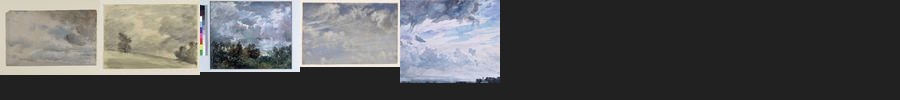

In [8]:
IIIF_IMAGE_URL = "https://framemark.vam.ac.uk/collections/%s/full/!100,100/0/default.jpg"
vam_clouds_df._primaryImageId = [IIIF_IMAGE_URL % item for item in vam_clouds_df._primaryImageId]
attach(vam_clouds_df, "_primaryImageId")
show()

So, a few cloud studies, one helpfully titled 'Study of Cirrus Clouds' which seems a good one to start with.

### Perceptual Hashing

One way to measure the distance between two images is the use of [Perceptual Hashing](https://tech.okcupid.com/evaluating-perceptual-image-hashes-okcupid/). Let's use the [ImageHash](https://github.com/JohannesBuchner/imagehash) library for Python to see how close the images are by the Perceptual Hashing algorithm which, at a very simplified explanation, subtracts one images representation from another one and gives a distance measure of how similiar the two images are.

First we need to let ImageHash analysis each image and store the representation of them from each collection.

In [9]:
import imagehash
from PIL import Image
import requests

vam_cloud_hashes = []
for index, obj in vam_clouds_df.iterrows():
  hash = imagehash.phash(Image.open(requests.get(obj['_primaryImageId'], stream=True).raw))
  vam_cloud_hashes.append(hash)
    
vam_clouds_df['Hash'] = vam_cloud_hashes

In [10]:
sciencemuseum_cloud_hashes = []
for index, obj in sciencemuseum_clouds_df.iterrows():
  hash = imagehash.phash(Image.open(requests.get(obj['Thumbnail'], stream=True).raw))
  sciencemuseum_cloud_hashes.append(hash)
    
sciencemuseum_clouds_df['Hash'] = sciencemuseum_cloud_hashes

Now we have the two hashes, we can subtract one from the other to see the distance between the images (the smaller the distance, the more similiar the images). Let's look at the distance from each of the Science Museum images to Constable's 'Study of Cirrus Clouds' sketch.

sciencemuseum_clouds_df['Hash'] - vam_clouds_df['Hash'].iloc[3]

In [18]:
sciencemuseum_clouds_df.iloc[1]['Title']

'Cloud study by Luke Howard, c1803-1811: Cirrus. Pencil and grey wash, 19x28cm'

In [17]:
vam_clouds_df.iloc[3]['_primaryTitle']

'Study of Cirrus Clouds'

This has found that the most similiar (with the lowest distance of 26 using [perceptual hashing](https://en.wikipedia.org/wiki/Perceptual_hashing)) between Constable's ['Study of Cirrus Clouds'](https://collections.vam.ac.uk/item/O82649/study-of-cirrus-clouds-oil-painting-constable-john-ra/) is Luke Howards [Cloud Study of Cirrus](https://collection.sciencemuseumgroup.org.uk/objects/co67177/cloud-study-of-cirrus-drawing). 

So far then (somewhat astonishingly given the total lack of real validity in this example) this seems to be working. Let's try now with a second Constable sketch, this time without a helpful title indicating the type of clouds.

In [13]:
sciencemuseum_clouds_df['Hash'] - vam_clouds_df['Hash'].iloc[0]

0     30
1     28
2     28
3     22
4     32
5     30
6     24
7     36
8     30
9     40
10    18
11    24
12    36
13    36
14    30
15    26
16    40
17    30
Name: Hash, dtype: object

In [19]:
vam_clouds_df.iloc[0]['_primaryTitle']

'Study of Clouds'

In [24]:
sciencemuseum_clouds_df.iloc[10]['Title']

'Cloud study by Luke Howard, c1803-1811: Cumulus. Blue wash, 12x16cm (recto); Brush dabs in blue wash ( verso)'

So, by this very very unscientific measure, the 11th sketch by Howard is the closest match to Constable's [Study of Clouds](https://collections.vam.ac.uk/item/O82726/study-of-clouds-oil-painting-constable-john-ra/), which is [Cumulus. Blue Wash](https://collection.sciencemuseumgroup.org.uk/objects/co67181/cloud-study-of-cumulus-drawing). 

## Further Work

An obvious further step in a real examination would be to apply some more recent image recognition techniques involving machine learning and neural network, and using a larger training set of cloud classifications. Let us [know](https://github.com/vanda/etc-docs/issues) if you try this out.

# Notebook Updates

## 24 June 2024

  * Update Science Museum API parsing as processed field is now @processed
  * Update Perception Hashing results to match new objects returned (yet still the Cirrus example works - amazingly)